# Online Retail Dataset
**Raihana Fawaz (1103210102)**

In [1]:
# Import libraries
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

In [2]:
data = pd.read_csv('/content/Online Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Baca data dalam chunks
chunk_size = 5000  # Sesuaikan ukuran chunk dengan kapasitas RAM Anda

In [4]:
# List untuk menampung hasil chunk yang telah diproses
data_list = []

In [5]:
# Baca data dalam chunks
chunk_size = 5000
data_list = []
for chunk in pd.read_csv('/content/Online Retail.csv', chunksize=chunk_size):
    data_list.append(chunk)

# Gabungkan data dari chunks
data = pd.concat(data_list, ignore_index=True)

In [6]:
# Gabungkan semua chunks menjadi satu DataFrame yang lebih kecil
data = pd.concat(data_list, axis=0)

In [7]:
# Ambil sampel 5% untuk mengurangi ukuran
data_sampled = data.sample(frac=0.05, random_state=0)

In [8]:
# Standarisasi data numerik yang disampled
# Pilih hanya kolom numerik untuk standarisasi
numeric_features = data_sampled.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled[numeric_features])

# Buat DataFrame baru dengan data yang telah distandarisasi
data_scaled = pd.DataFrame(data_scaled, columns=numeric_features, index=data_sampled.index)

# Gabungkan kembali kolom non-numerik (jika diperlukan)
data_scaled = pd.concat([data_scaled, data_sampled.drop(columns=numeric_features)], axis=1)

In [9]:
!pip install scikit-learn
from sklearn.cluster import MiniBatchKMeans

# Standarisasi data numerik yang disampled
# Pilih hanya kolom numerik untuk standarisasi, kecualikan kolom 'StockCode' dan kolom non-numerik lainnya
numeric_features = data_sampled.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop('CustomerID', errors='ignore')  # Mengabaikan kesalahan jika 'CustomerID' tidak ada
# ... (kode lainnya tetap sama)

# Terapkan MiniBatchKMeans pada data yang sudah disampled dan distandarisasi
# Pastikan Anda hanya menggunakan kolom numerik yang telah distandarisasi
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
minibatch_labels = minibatch_kmeans.fit_predict(data_scaled[numeric_features])

In [10]:
# Hitung Silhouette Score
# Hanya gunakan kolom numerik yang telah distandarisasi untuk menghitung Silhouette Score
minibatch_silhouette = silhouette_score(data_scaled[numeric_features], minibatch_labels)
print("MiniBatchKMeans Silhouette Score:", minibatch_silhouette)

MiniBatchKMeans Silhouette Score: 0.4592443871304266


In [11]:
# Baca data dalam chunks
chunk_size = 5000
data_list = []
for chunk in pd.read_csv('/content/Online Retail.csv', chunksize=chunk_size):
    chunk = chunk[['Quantity', 'UnitPrice']].dropna()
    data_list.append(chunk)

In [12]:
data = pd.concat(data_list, axis=0)
data_sampled = data.sample(frac=0.05, random_state=0)  # Sampling 10%

In [13]:
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk KMeans
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(data_scaled, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Score:", kmeans_davies)
print("K-Means Calinski-Harabasz Score:", kmeans_calinski)

K-Means Silhouette Score: 0.9978624351091656
K-Means Davies-Bouldin Score: 0.22063081786396274
K-Means Calinski-Harabasz Score: 51089.50160800418


In [15]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Hitung nilai Silhouette dan Davies-Bouldin untuk Agglomerative Clustering
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
agglo_davies = davies_bouldin_score(data_scaled, agglo_labels)
agglo_calinski = calinski_harabasz_score(data_scaled, agglo_labels)

print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)
print("Agglomerative Clustering Davies-Bouldin Score:", agglo_davies)
print("Agglomerative Clustering Calinski-Harabasz Score:", agglo_calinski)

Agglomerative Clustering Silhouette Score: 0.9971904524512569
Agglomerative Clustering Davies-Bouldin Score: 0.3056782878234072
Agglomerative Clustering Calinski-Harabasz Score: 62288.64900019258


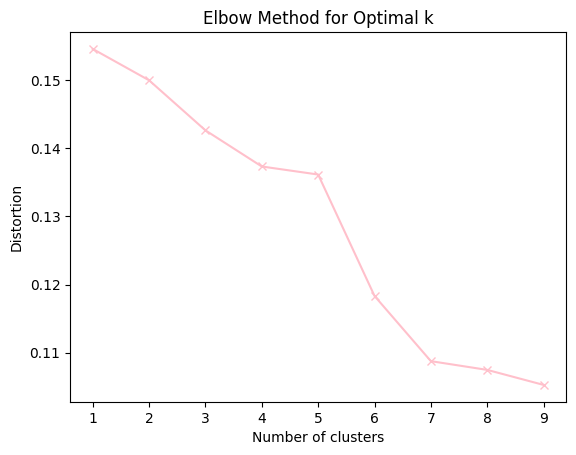

In [16]:
# Menghitung distortions untuk menentukan nilai k optimal
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(sum(np.min(cdist(data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])

plt.plot(K, distortions, color='pink', marker='x')  # Ubah warna menjadi pink
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()